In [5]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [7]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [26]:
import os
import numpy as np
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Flatten, Conv2D, Dense, Dropout, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
% cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [4]:
#!unzip vegitable.zip

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Radish/0001.jpg  
  inflating: Vegetable Images/train/Radish/0002.jpg  
  inflating: Vegetable Images/train/Radish/0003.jpg  
  inflating: Vegetable Images/train/Radish/0004.jpg  
  inflating: Vegetable Images/train/Radish/0005.jpg  
  inflating: Vegetable Images/train/Radish/0006.jpg  
  inflating: Vegetable Images/train/Radish/0007.jpg  
  inflating: Vegetable Images/train/Radish/0008.jpg  
  inflating: Vegetable Images/train/Radish/0009.jpg  
  inflating: Vegetable Images/train/Radish/0010.jpg  
  inflating: Vegetable Images/train/Radish/0011.jpg  
  inflating: Vegetable Images/train/Radish/0012.jpg  
  inflating: Vegetable Images/train/Radish/0013.jpg  
  inflating: Vegetable Images/train/Radish/0014.jpg  
  inflating: Vegetable Images/train/Radish/0015.jpg  
  inflating: Vegetable Images/train/Radish/0016.jpg  
  inflating: Vegetable Images/train/Radish/0017.jpg  
  inflating: Vegetable Images/t

In [9]:
base_dir = "VegetableImages"
train_path = os.path.join(base_dir, 'train/')
test_path = os.path.join(base_dir, 'test/')
val_path = os.path.join(base_dir, 'validation/')

In [10]:
print("Number of train images in each Category")
print("==========================================")
print("Number of directories: ", len(os.listdir(train_path)))
for dir in os.listdir(train_path):
  print(dir, len(os.listdir(train_path+dir)))

print("Number of test images in each Category")
print("==========================================")

for dir in os.listdir(test_path):
  print(dir, len(os.listdir(test_path+dir)))


print("Number of validation images in each Category")
print("==========================================")

for dir in os.listdir(val_path):
  print(dir, len(os.listdir(val_path+dir)))

Number of train images in each Category
Number of directories:  15
Bean 1000
Bitter_Gourd 1000
Bottle_Gourd 1000
Brinjal 1000
Broccoli 1000
Cabbage 1000
Capsicum 1000
Carrot 1000
Cauliflower 1000
Cucumber 1000
Papaya 1000
Potato 1000
Pumpkin 1000
Radish 1000
Tomato 1000
Number of test images in each Category
Bean 200
Bitter_Gourd 200
Bottle_Gourd 200
Brinjal 200
Broccoli 200
Cabbage 200
Capsicum 200
Carrot 200
Cauliflower 200
Cucumber 200
Papaya 200
Potato 200
Pumpkin 200
Radish 200
Tomato 200
Number of validation images in each Category
Bean 200
Bitter_Gourd 200
Bottle_Gourd 200
Brinjal 200
Broccoli 200
Cabbage 200
Capsicum 200
Carrot 200
Cauliflower 200
Cucumber 200
Papaya 200
Potato 200
Pumpkin 200
Radish 200
Tomato 200


In [11]:
random.sample(os.listdir(train_path+'Bean'), 1)

['1277.jpg']

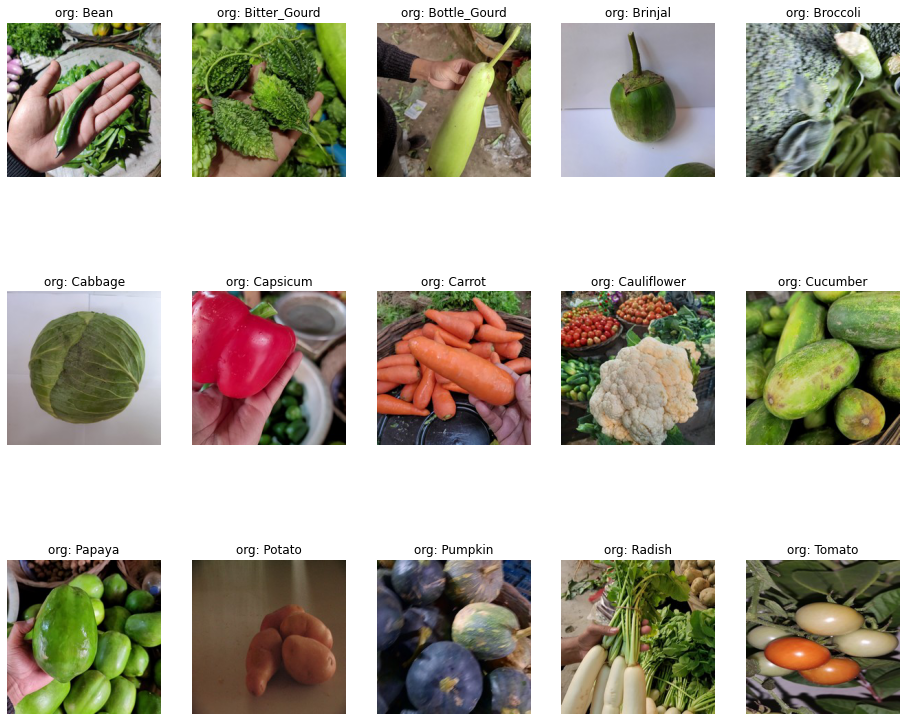

In [12]:
from tensorflow.python.ops.gen_logging_ops import image_summary
k=1
plt.figure(figsize=(16,14))
for dir in os.listdir(train_path):
  random_img = random.sample(os.listdir(train_path+dir),1)
  img = load_img(train_path+dir+'/'+random_img[0], target_size=(224,224))

  i = img_to_array(img)/255.
  img_arr = np.array(i)
  plt.subplot(3,5,k)
  plt.imshow(img_arr)
  plt.title("org: {}".format(dir))
  plt.axis('off')
  k+=1

plt.show()

In [13]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=30,
                                   height_shift_range=0.1,
                                   width_shift_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

In [17]:
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(150,150),
                                                    class_mode='categorical',
                                                    batch_size=100)

test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(150,150),
                                                  class_mode='categorical',
                                                  batch_size=100)
val_generator = val_datagen.flow_from_directory(val_path, 
                                                target_size=(150,150),
                                                class_mode='categorical',
                                                batch_size=100)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [93]:
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(150,150),
                                                  class_mode='categorical',
                                                  batch_size=100,
                                                  shuffle=False)

Found 3000 images belonging to 15 classes.


In [22]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(150,150,3)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(15, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 64)      1792      
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 75, 75, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                  

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
mc = ModelCheckpoint('vegetable_classifier.h5', monitor='val_loss', mode='min', save_best_only=True)

es = EarlyStopping(monitor='accuracy', min_delta=0.01, patience=3, mode='max')

In [25]:
hist = model.fit(train_generator, epochs=30, validation_data=val_generator, callbacks=[mc,es])

Epoch 1/30
150/150 [==============================] - 175s 1s/step - loss: 2.2967 - accuracy: 0.2621 - val_loss: 1.6464 - val_accuracy: 0.4507
Epoch 2/30
150/150 [==============================] - 174s 1s/step - loss: 1.6080 - accuracy: 0.4519 - val_loss: 1.2804 - val_accuracy: 0.5793
Epoch 3/30
150/150 [==============================] - 175s 1s/step - loss: 1.3902 - accuracy: 0.5299 - val_loss: 1.1692 - val_accuracy: 0.6030
Epoch 4/30
150/150 [==============================] - 174s 1s/step - loss: 1.2232 - accuracy: 0.5834 - val_loss: 0.9686 - val_accuracy: 0.6860
Epoch 5/30
150/150 [==============================] - 171s 1s/step - loss: 1.1345 - accuracy: 0.6135 - val_loss: 1.0728 - val_accuracy: 0.6440
Epoch 6/30
150/150 [==============================] - 172s 1s/step - loss: 1.0329 - accuracy: 0.6509 - val_loss: 0.8204 - val_accuracy: 0.7073
Epoch 7/30
150/150 [==============================] - 176s 1s/step - loss: 0.9402 - accuracy: 0.6776 - val_loss: 0.6883 - val_accuracy: 0.7833

In [29]:
valloss, valaccuracy = model.evaluate(val_generator)

testloss, testaccuracy = model.evaluate(test_generator)


print("\nValidation accuracy: {}, validation loss: {}".format(valaccuracy, valloss))
print("\nTest accuracy: {}, Test loss: {}".format(testaccuracy, testloss))

30/30 [==============================] - 15s 478ms/step - loss: 0.2447 - accuracy: 0.9190

Validation accuracy: 0.921999990940094, validation loss: 0.2640679180622101

Test accuracy: 0.9190000295639038, Test loss: 0.24470627307891846


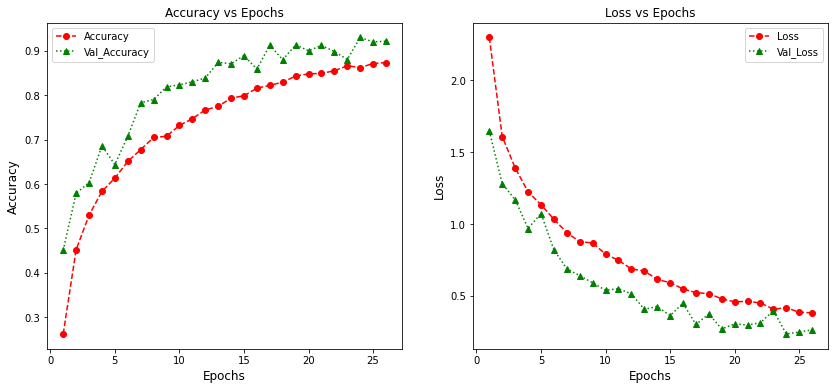

In [37]:
acc = hist.history['accuracy']
loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'ro--', label='Accuracy')
plt.plot(epochs, val_acc, 'g^:', label='Val_Accuracy')
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'ro--', label='Loss')
plt.plot(epochs, val_loss, 'g^:', label='Val_Loss')
plt.title("Loss vs Epochs")
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend()

plt.show()

## Loading the saved model at best val_loss

In [31]:
model1 = load_model('vegetable_classifier.h5')

In [34]:
valloss, valaccuracy = model1.evaluate(val_generator)

testloss, testaccuracy = model1.evaluate(test_generator)

print("\nValidation accuracy: {}, validation loss: {}".format(valaccuracy, valloss))
print("\nTest accuracy: {}, Test loss: {}".format(testaccuracy, testloss))

30/30 [==============================] - 17s 548ms/step - loss: 0.2279 - accuracy: 0.9330

Validation accuracy: 0.9303333163261414, validation loss: 0.23536843061447144

Test accuracy: 0.9330000281333923, Test loss: 0.22791339457035065


In [94]:
prediction = model1.predict(test_generator)

In [95]:
prediction[3], np.argmax(prediction[2])

(array([9.87617195e-01, 2.09722566e-06, 1.83961632e-07, 1.87506710e-04,
        1.46571365e-05, 2.29308853e-07, 9.06689558e-03, 1.41447942e-09,
        9.96682502e-05, 1.83856857e-04, 7.37002556e-05, 4.65298911e-09,
        1.03472848e-06, 1.36563703e-08, 2.75290501e-03], dtype=float32), 0)

In [96]:
y_pred = [np.argmax(i) for i in prediction]
#y_pred = np.argmax(prediction, axis=1)

In [97]:
y_pred[0:5]

[0, 0, 0, 0, 0]

## Predict Random Images

In [68]:
img_arr.reshape(-1,150,150,3).shape

(1, 150, 150, 3)

In [76]:
class_dict = test_generator.class_indices
class_list = []
for item, num in class_dict.items():
  class_list.append(item)

class_list

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

In [77]:
pred = model1.predict(img_arr.reshape(-1,150,150,3))
class_list[np.argmax(pred)]

'Bean'

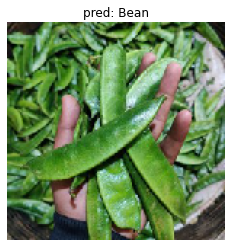

In [78]:
img = load_img('VegetableImages/test/Bean/0001.jpg', target_size=(150,150))

i = img_to_array(img)/255.
img_arr = np.array(i)
plt.imshow(img_arr)
plt.axis('off')
pred = model1.predict(img_arr.reshape(-1, 150, 150, 3))
plt.title("pred: {}".format(class_list[np.argmax(pred)]) )
plt.show()

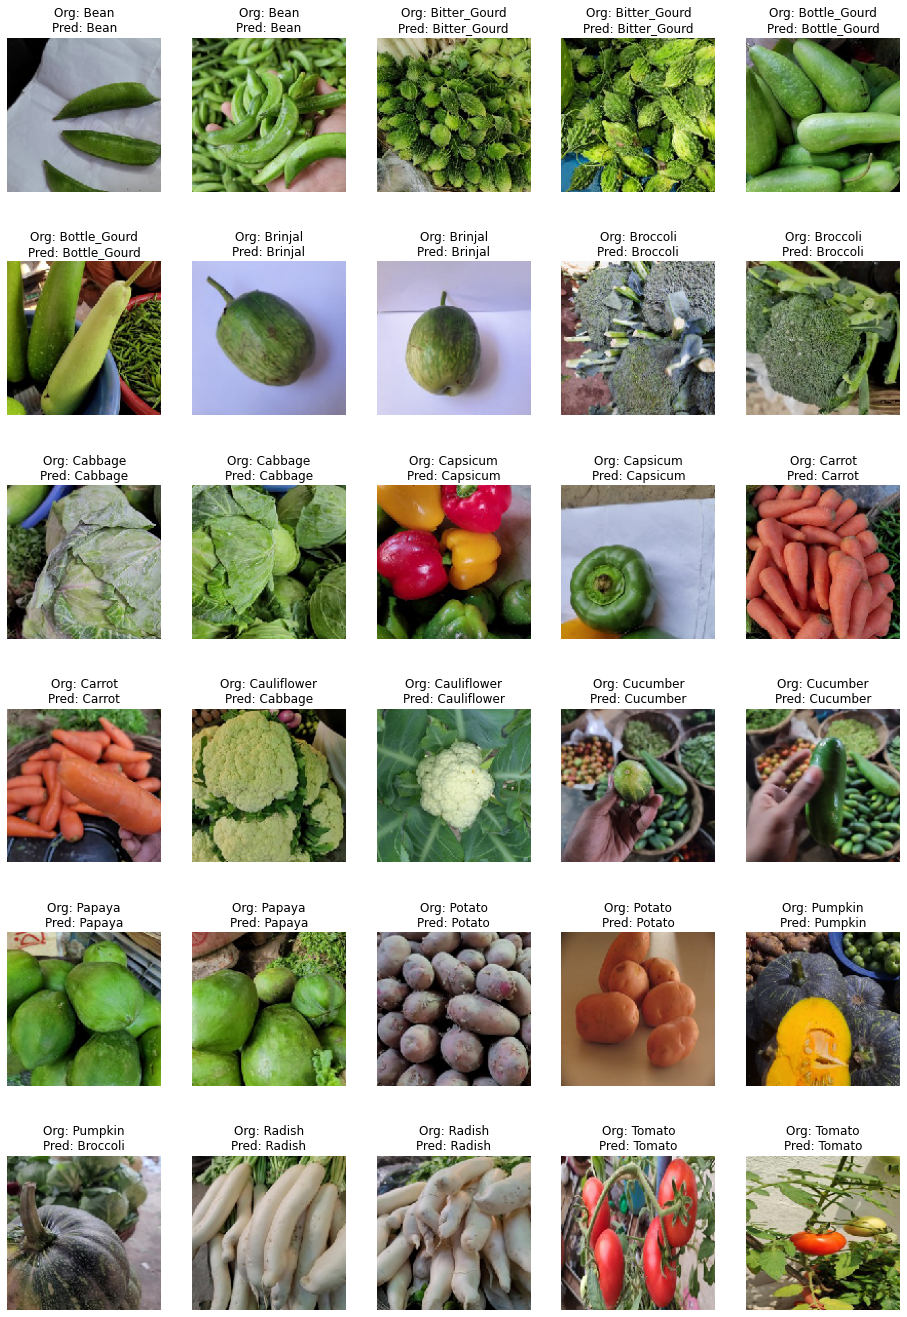

In [81]:
k=1
plt.figure(figsize=(16,24))

for dir in os.listdir(test_path):
  for i in range(2):
    random_img = random.sample(os.listdir(test_path+dir),1)
    img = load_img(test_path+dir+'/'+random_img[0], target_size=(150,150))

    i = img_to_array(img)/255.
    plt.subplot(6,5,k)
    img_arr = np.array(i)
    plt.imshow(img_arr)
    pred = model1.predict(img_arr.reshape(-1,150,150,3))
    plt.title("Org: {}\nPred: {}".format(dir, class_list[np.argmax(pred)] ))
    plt.axis('off')
    k+=1

plt.show()

## Getting Performance Scores

In [98]:
y_true = test_generator.classes

In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)
cm

array([[194,   1,   0,   3,   0,   1,   0,   0,   0,   0,   1,   0,   0,
          0,   0],
       [  4, 193,   0,   0,   2,   0,   0,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0, 194,   1,   0,   0,   0,   0,   0,   1,   4,   0,   0,
          0,   0],
       [  1,   1,   4, 186,   2,   3,   0,   0,   0,   1,   2,   0,   0,
          0,   0],
       [  1,   1,   0,   0, 195,   2,   0,   0,   0,   0,   0,   0,   1,
          0,   0],
       [  0,   8,   0,   0,  19, 168,   0,   0,   1,   1,   0,   0,   3,
          0,   0],
       [  3,   0,   2,   0,   0,   0, 191,   0,   0,   0,   0,   0,   0,
          0,   4],
       [  0,   0,   0,   0,   0,   0,   0, 198,   0,   0,   0,   0,   0,
          1,   1],
       [  1,   1,   0,   0,   3,  13,   0,   0, 176,   1,   0,   0,   2,
          0,   3],
       [  1,   0,   4,   3,   2,   2,   0,   0,   1, 187,   0,   0,   0,
          0,   0],
       [  1,   0,   7,   6,   0,   0,   2,   0,   0,   0, 182,   0,   0,
       

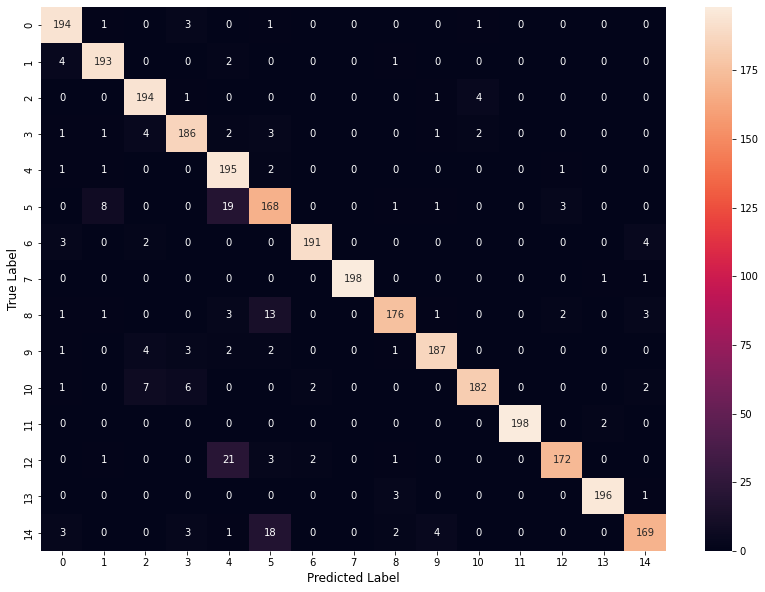

In [100]:
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=class_list) )

              precision    recall  f1-score   support

        Bean       0.93      0.97      0.95       200
Bitter_Gourd       0.94      0.96      0.95       200
Bottle_Gourd       0.92      0.97      0.94       200
     Brinjal       0.92      0.93      0.93       200
    Broccoli       0.80      0.97      0.88       200
     Cabbage       0.80      0.84      0.82       200
    Capsicum       0.98      0.95      0.97       200
      Carrot       1.00      0.99      0.99       200
 Cauliflower       0.95      0.88      0.91       200
    Cucumber       0.96      0.94      0.95       200
      Papaya       0.96      0.91      0.94       200
      Potato       1.00      0.99      0.99       200
     Pumpkin       0.97      0.86      0.91       200
      Radish       0.98      0.98      0.98       200
      Tomato       0.94      0.84      0.89       200

    accuracy                           0.93      3000
   macro avg       0.94      0.93      0.93      3000
weighted avg       0.94   

# Build a model using Transfer Learning

In [107]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

In [108]:
base_model = MobileNetV2(input_shape= (150,150,3), include_top=False, weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [109]:
for layers in base_model.layers:
  layers.trainable=False

In [110]:
from tensorflow.keras.layers import GlobalAveragePooling2D
model_mnet = Sequential()
model_mnet.add(base_model)
model_mnet.add(GlobalAveragePooling2D())
model_mnet.add(Dense(1024, activation='relu'))
model_mnet.add(Dense(15, activation='softmax'))

model_mnet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_4 (Dense)             (None, 1024)              1311744   
                                                                 
 dense_5 (Dense)             (None, 15)                15375     
                                                                 
Total params: 3,585,103
Trainable params: 1,327,119
Non-trainable params: 2,257,984
_________________________________________________________________


In [111]:
model_mnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [112]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator = datagen.flow_from_directory(train_path,
                                              target_size=(150,150),
                                              class_mode='categorical',
                                              batch_size=100)

val_generator = datagen.flow_from_directory(val_path,
                                            target_size=(150,150),
                                            class_mode='categorical',
                                            batch_size=100)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [113]:
hist_mnet = model_mnet.fit(train_generator, epochs=30, validation_data=val_generator, callbacks=[es])

Epoch 1/30
150/150 [==============================] - 106s 615ms/step - loss: 0.1124 - accuracy: 0.9670 - val_loss: 0.0142 - val_accuracy: 0.9953
Epoch 2/30
150/150 [==============================] - 93s 620ms/step - loss: 0.0118 - accuracy: 0.9967 - val_loss: 0.0140 - val_accuracy: 0.9957
Epoch 3/30
150/150 [==============================] - 66s 439ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.0059 - val_accuracy: 0.9983
Epoch 4/30
150/150 [==============================] - 65s 436ms/step - loss: 9.8194e-04 - accuracy: 0.9997 - val_loss: 0.0033 - val_accuracy: 0.9990
Epoch 5/30
150/150 [==============================] - 65s 433ms/step - loss: 2.1718e-04 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 0.9993


In [114]:
save_model(model_mnet, 'vegitable_classifier_mnet.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [115]:
test_generator = datagen.flow_from_directory(test_path,
                                             target_size=(150,150),
                                             class_mode='categorical',
                                             batch_size=100,
                                             shuffle=False)

Found 3000 images belonging to 15 classes.


In [116]:
valloss, valaccuracy = model_mnet.evaluate(val_generator)

testloss, testaccuracy = model_mnet.evaluate(test_generator)


print("\nValidation accuracy: {}, validation loss: {}".format(valaccuracy, valloss))
print("\nTest accuracy: {}, Test loss: {}".format(testaccuracy, testloss))

30/30 [==============================] - 16s 539ms/step - loss: 0.0047 - accuracy: 0.9990

Validation accuracy: 0.9993333220481873, validation loss: 0.0028796030674129725

Test accuracy: 0.9990000128746033, Test loss: 0.004747624509036541


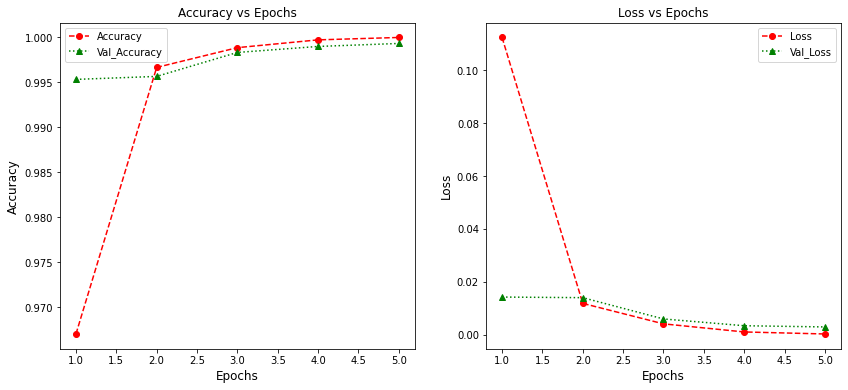

In [117]:
acc = hist_mnet.history['accuracy']
loss = hist_mnet.history['loss']
val_acc = hist_mnet.history['val_accuracy']
val_loss = hist_mnet.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'ro--', label='Accuracy')
plt.plot(epochs, val_acc, 'g^:', label='Val_Accuracy')
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'ro--', label='Loss')
plt.plot(epochs, val_loss, 'g^:', label='Val_Loss')
plt.title("Loss vs Epochs")
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend()

plt.show()

# Getting Performance Score

In [118]:
prediction_mnet = model_mnet.predict(test_generator)

In [119]:
y_pred_mnet = np.argmax(prediction_mnet, axis=1)

In [121]:
y_test_mnet = test_generator.classes
y_test_mnet[:6]

array([0, 0, 0, 0, 0, 0], dtype=int32)

In [122]:
y_pred_mnet[:6]

array([0, 0, 0, 0, 0, 0])

In [123]:
cm_mnet = confusion_matrix(y_test_mnet, y_pred_mnet)
cm_mnet

array([[200,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0, 199,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0],
       [  0,   0, 200,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 200,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 200,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 200,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 200,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 200,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 200,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0, 199,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 199,   0,   0,
       

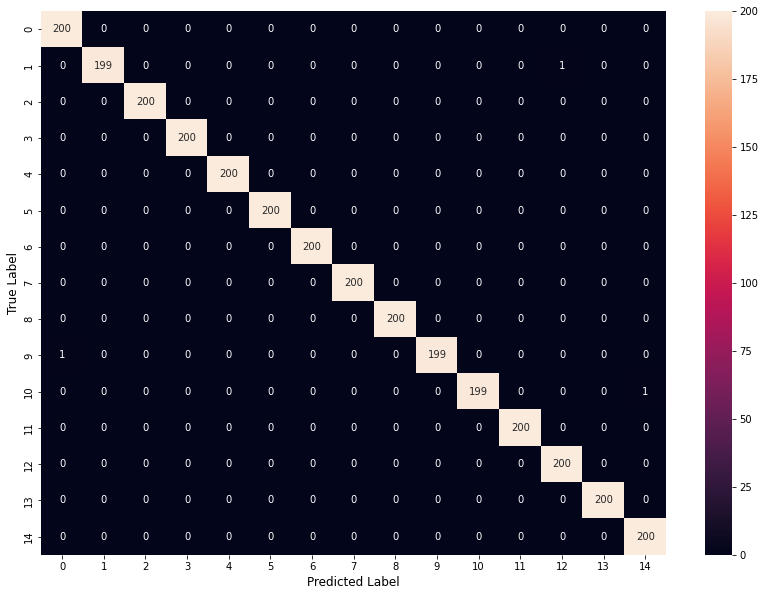

In [124]:
plt.figure(figsize=(14,10))
sns.heatmap(cm_mnet, annot = True, fmt='d')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

In [126]:
print(classification_report(y_test_mnet, y_pred_mnet, target_names=class_list) )

              precision    recall  f1-score   support

        Bean       1.00      1.00      1.00       200
Bitter_Gourd       1.00      0.99      1.00       200
Bottle_Gourd       1.00      1.00      1.00       200
     Brinjal       1.00      1.00      1.00       200
    Broccoli       1.00      1.00      1.00       200
     Cabbage       1.00      1.00      1.00       200
    Capsicum       1.00      1.00      1.00       200
      Carrot       1.00      1.00      1.00       200
 Cauliflower       1.00      1.00      1.00       200
    Cucumber       1.00      0.99      1.00       200
      Papaya       1.00      0.99      1.00       200
      Potato       1.00      1.00      1.00       200
     Pumpkin       1.00      1.00      1.00       200
      Radish       1.00      1.00      1.00       200
      Tomato       1.00      1.00      1.00       200

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00   

## Predicting some random images

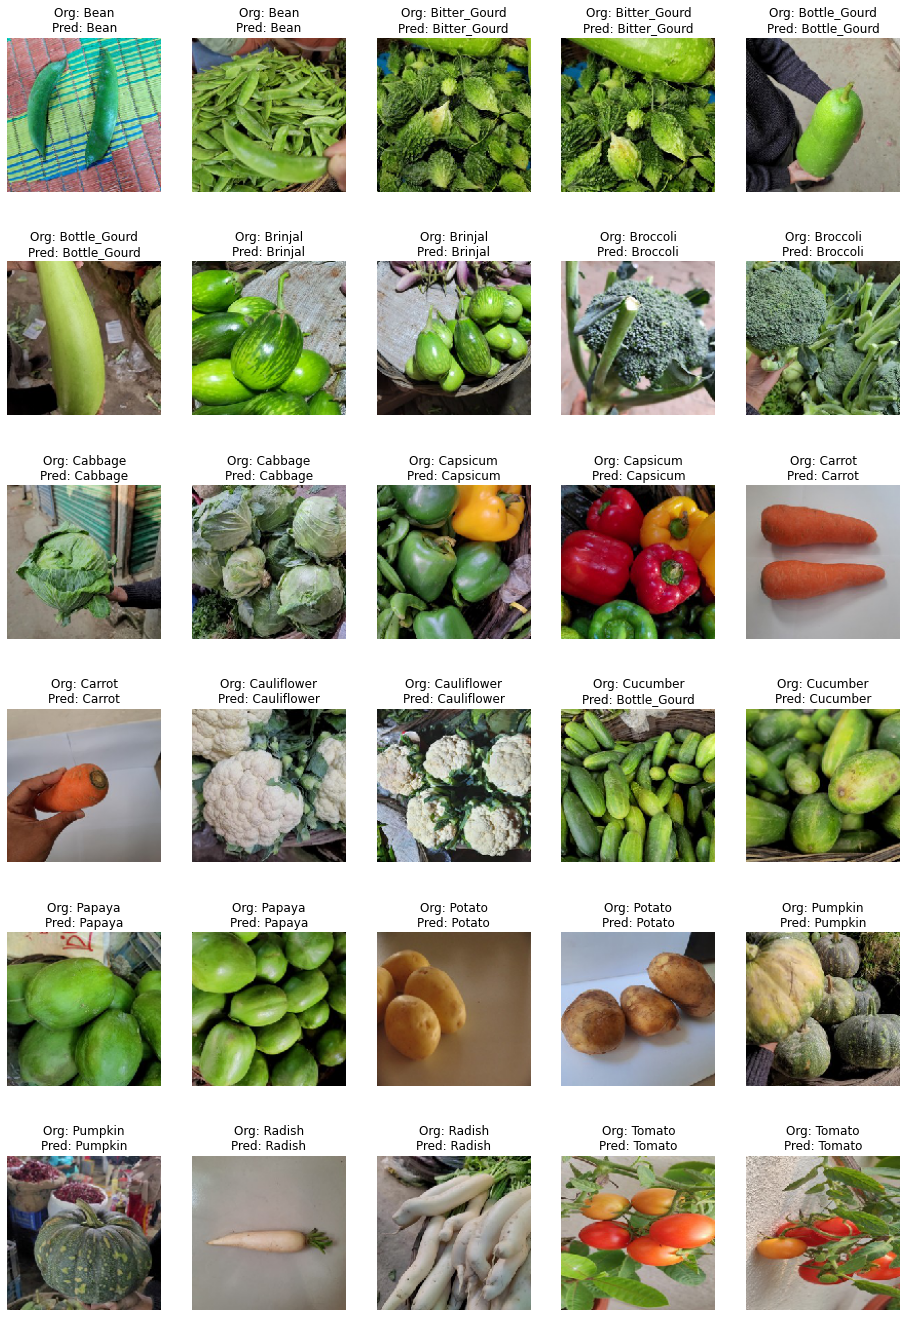

In [127]:
k=1
plt.figure(figsize=(16,24))

for dir in os.listdir(test_path):
  for i in range(2):
    random_img = random.sample(os.listdir(test_path+dir),1)
    img = load_img(test_path+dir+'/'+random_img[0], target_size=(150,150))

    i = img_to_array(img)/255.
    plt.subplot(6,5,k)
    img_arr = np.array(i)
    plt.imshow(img_arr)
    pred = model_mnet.predict(img_arr.reshape(-1,150,150,3))
    plt.title("Org: {}\nPred: {}".format(dir, class_list[np.argmax(pred)] ))
    plt.axis('off')
    k+=1

plt.show()